In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
train = pd.read_csv("proteinas_train.csv")
test = pd.read_csv("proteinas_test.csv")

print("Train shape:", train.shape)
print("Test shape:", test.shape)

display(train.head())

Train shape: (16000, 10)
Test shape: (4000, 10)


,ID_Proteína,Sequência,Massa_Molecular,Ponto_Isoelétrico,Hidrofobicidade,Carga_Total,Proporção_Polar,Proporção_Apolar,Comprimento_Sequência,Classe
0,TRAIN_P00001,GNMRFVLHDEETHWGTLRTTLNCVPSDIYTISGEDSLFWGMAHPFC...,20362.9468,4.866123,0.149425,-3,0.241379,0.408046,174,Estrutural
1,TRAIN_P00002,LFKMQCSFYLLYLAKEAASYQVSMNMLCYEWYNYVYQVTVILRLSR...,9328.7909,6.298636,0.217105,0,0.210526,0.513158,76,Estrutural
2,TRAIN_P00003,PAHLWPYWRFYVWIVFYGYHNPNYHFGMKEVKERPDCKNCTVAVLF...,17616.3852,8.458977,0.192568,8,0.141892,0.466216,148,Estrutural
3,TRAIN_P00004,GEAFSRPHCFACAATKKGFPWARMCCTTSMAMDGVQSKMHKSKHRF...,35244.2968,8.448340,0.160473,21,0.189189,0.408784,296,Estrutural
4,TRAIN_P00005,HYVFQGLMLHCGGYMITACGFGVIFPEQMTREGLIMHTARAHHFLI...,34557.9931,7.696306,0.140411,18,0.202055,0.380137,292,Receptora


Missing values per column:
 ID_Proteína              0
Sequência                0
Massa_Molecular          0
Ponto_Isoelétrico        0
Hidrofobicidade          0
Carga_Total              0
Proporção_Polar          0
Proporção_Apolar         0
Comprimento_Sequência    0
Classe                   0
seq_length               0
dtype: int64


,Massa_Molecular,Ponto_Isoelétrico,Hidrofobicidade,Carga_Total,Proporção_Polar,Proporção_Apolar,Comprimento_Sequência,seq_length
count,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000
mean,20708.209250,7.274537,0.149983,8.729938,0.200260,0.399930,174.033688,174.033688
std,8678.439780,1.448253,0.027485,7.537891,0.033875,0.042192,72.920304,72.920304
min,5463.212900,4.050028,0.014563,-20.000000,0.049180,0.200000,50.000000,50.000000
25%,13165.853975,6.048970,0.132911,3.000000,0.178899,0.373376,111.000000,111.000000
50%,20597.677000,7.196834,0.150000,8.000000,0.200000,0.400000,173.000000,173.000000
75%,28193.961625,8.586190,0.167364,13.000000,0.221239,0.426573,237.000000,237.000000
max,37588.751700,11.711987,0.284314,47.000000,0.380282,0.607843,300.000000,300.000000


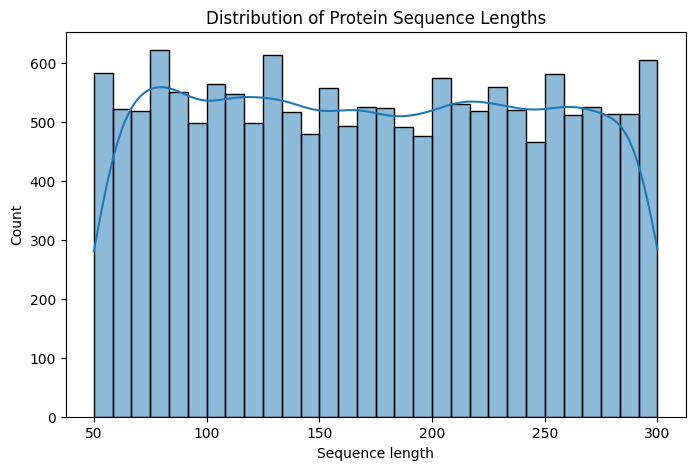

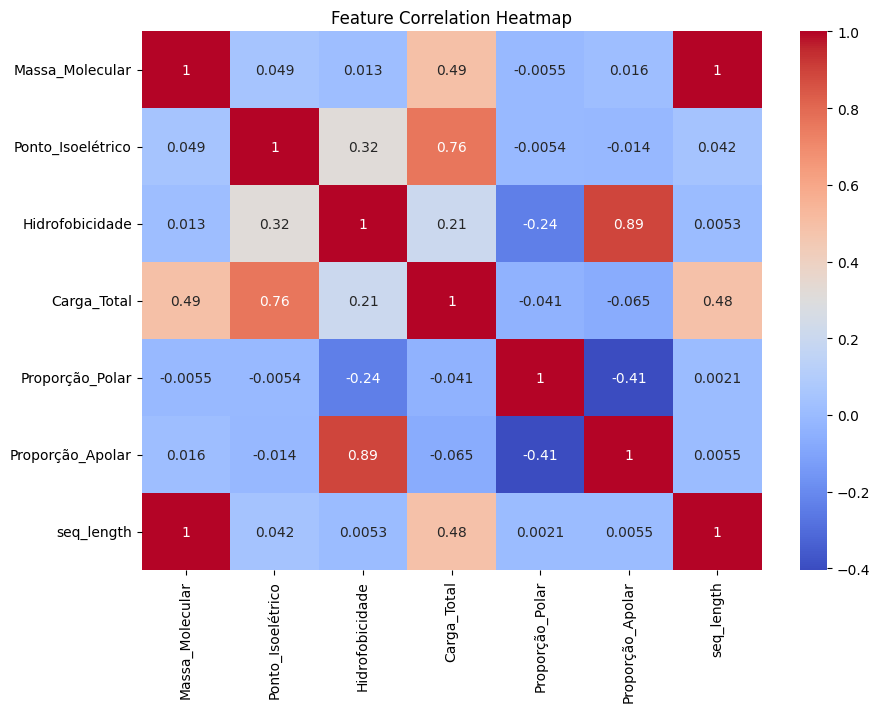

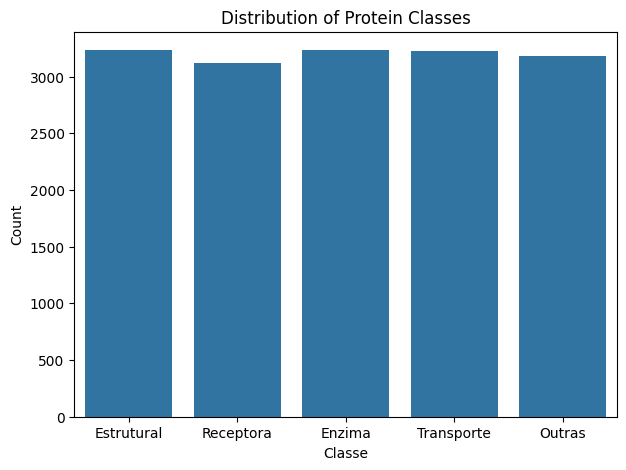

In [3]:
# Step 2: Exploratory Data Analysis

# Check for missing values
print("Missing values per column:\n", train.isnull().sum())

# Basic stats for numeric features
display(train.describe())

# Add sequence length as a feature
train['seq_length'] = train['Sequência'].apply(len)

# Distribution of protein sequence lengths
plt.figure(figsize=(8,5))
sns.histplot(train['seq_length'], bins=30, kde=True)
plt.title("Distribution of Protein Sequence Lengths")
plt.xlabel("Sequence length")
plt.ylabel("Count")
plt.show()

# Correlation heatmap for numeric features
numeric_cols = [
    'Massa_Molecular',
    'Ponto_Isoelétrico',
    'Hidrofobicidade',
    'Carga_Total',
    'Proporção_Polar',
    'Proporção_Apolar',
    'seq_length'
]

plt.figure(figsize=(10,7))
sns.heatmap(train[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# 6. Class distribution
plt.figure(figsize=(7,5))
sns.countplot(x='Classe', data=train)
plt.title('Distribution of Protein Classes')
plt.xlabel('Classe')
plt.ylabel('Count')
plt.show()

Accuracy: 0.203125

Classification Report:
               precision    recall  f1-score   support

      Enzima       0.20      0.21      0.20       647
  Estrutural       0.19      0.19      0.19       646
      Outras       0.22      0.22      0.22       637
   Receptora       0.21      0.21      0.21       625
  Transporte       0.19      0.19      0.19       645

    accuracy                           0.20      3200
   macro avg       0.20      0.20      0.20      3200
weighted avg       0.20      0.20      0.20      3200



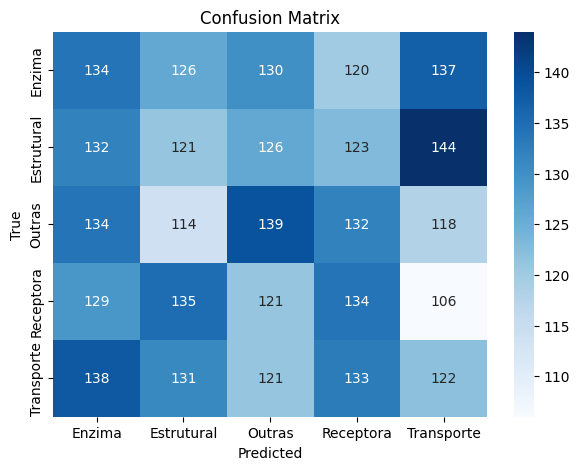

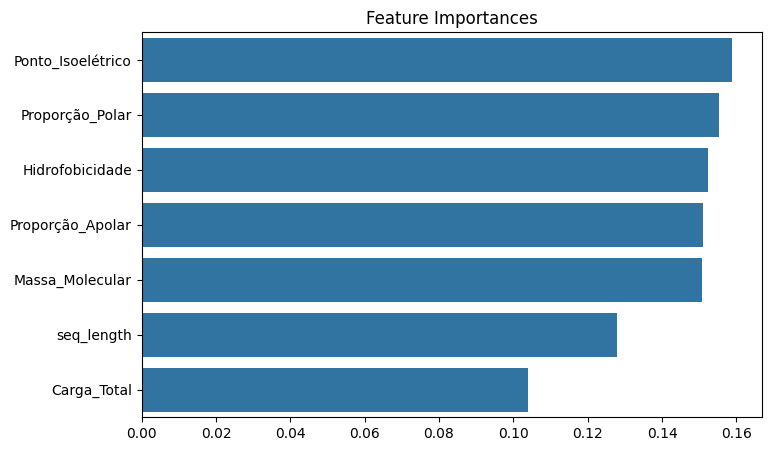

In [4]:
# Step 3: Feature Engineering & Classification Model

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Features and target
feature_cols = [
    'Massa_Molecular',
    'Ponto_Isoelétrico',
    'Hidrofobicidade',
    'Carga_Total',
    'Proporção_Polar',
    'Proporção_Apolar',
    'seq_length'
]
X = train[feature_cols]
y = train['Classe']

# Train test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Random Forest
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_val)

# Evaluation
print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))

# Confusion matrix
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Feature importance
importances = model.feature_importances_
indices = importances.argsort()[::-1]

plt.figure(figsize=(8,5))
sns.barplot(x=importances[indices], y=[feature_cols[i] for i in indices])
plt.title("Feature Importances")
plt.show()

Accuracy with AAC: 0.20375

Classification Report:
               precision    recall  f1-score   support

      Enzima       0.21      0.24      0.22       647
  Estrutural       0.22      0.24      0.23       646
      Outras       0.21      0.20      0.20       637
   Receptora       0.19      0.16      0.17       625
  Transporte       0.18      0.19      0.19       645

    accuracy                           0.20      3200
   macro avg       0.20      0.20      0.20      3200
weighted avg       0.20      0.20      0.20      3200



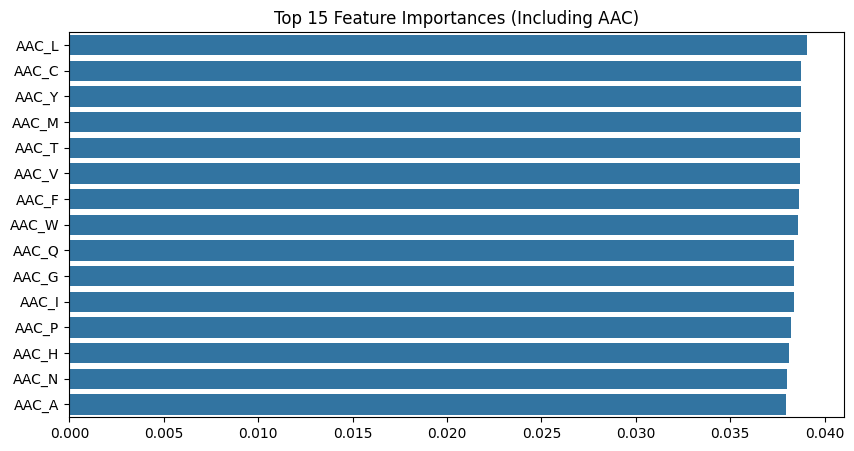

In [5]:
# Step 4: Adding AAC Features

from collections import Counter
import string

# 20 standard amino acids
AMINO_ACIDS = list("ACDEFGHIKLMNPQRSTVWY")

def compute_aac(seq):
    counts = Counter(seq)
    total = len(seq)
    return [counts.get(aa, 0)/total for aa in AMINO_ACIDS]

# Create AAC features
aac_features = train['Sequência'].apply(compute_aac)
aac_df = pd.DataFrame(aac_features.tolist(), columns=[f"AAC_{aa}" for aa in AMINO_ACIDS])

# Combine AAC features with numeric features
X_full = pd.concat([train[feature_cols].reset_index(drop=True), aac_df.reset_index(drop=True)], axis=1)
y_full = train['Classe']

# Split again
X_train, X_val, y_train, y_val = train_test_split(X_full, y_full, test_size=0.2, random_state=42, stratify=y_full)

# Train with AAC features
model_aac = RandomForestClassifier(n_estimators=300, random_state=42)
model_aac.fit(X_train, y_train)

# Predict
y_pred_aac = model_aac.predict(X_val)

print("Accuracy with AAC:", accuracy_score(y_val, y_pred_aac))
print("\nClassification Report:\n", classification_report(y_val, y_pred_aac))

# Feature importance (top 15)
importances = model_aac.feature_importances_
indices = importances.argsort()[::-1]
top_indices = indices[:15]

plt.figure(figsize=(10,5))
sns.barplot(x=importances[top_indices], y=[X_full.columns[i] for i in top_indices])
plt.title("Top 15 Feature Importances (Including AAC)")
plt.show()

In [6]:
import joblib

# Save model and features
joblib.dump(model_aac, "protein_model.pkl")
joblib.dump(X_full.columns.tolist(), "feature_columns.pkl")

['feature_columns.pkl']